# Code for final project

# Title: 
## Voting and vola<u>tea</u>lity: Explanation of electoral behavior in British elections 2015, 2017

### Project for Introduction to Data Science course
### Author: Bogdan Romanov

________________________________

### 1. Uploading packages and relevant parameters

In [1]:
from tqdm.notebook import tqdm
from IPython.display import display, HTML, Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None 
pd.set_option('display.max_columns', 50)

### 2. Reading files manually from the working directory

In [2]:
dataW04 = pd.read_stata("BES2015_W4_v6.0-2.dta")
dataW12 = pd.read_stata("BES2015_W12_v3.0-2.dta")

### 3. Operationalization of dependent and independent variables by reading through the codebook-questionnaire of waves 4 and 12

<a href="https://www.britishelectionstudy.com/wp-content/uploads/2020/05/Bes_wave19Documentation_V2.pdf">Questionnaire for wave 4</a>

<a href="https://www.britishelectionstudy.com/wp-content/uploads/2020/11/Bes_wave20Documentation_V2.pdf">Questionnaire for wave 12</a>

<b><center>Dependent variable — Party affiliation and electoral decision-making</center></b>

 <ul>
  <li>partyId — Generally speaking, do you think of yourself as Labour, Conservative, Liberal Democrat or what?</li>
  <li>generalElectionVote — And if there were a UK General Election tomorrow, which party would you vote for?</li>
</ul> 

<b><center>Independent variables — Hypothesis 1 — Party has or does not have chances to win elections</center></b>

 <ul>
  <li>winConstituencyPlacement — How likely is it that each of these parties will win the General Election in your local constituency? (0-Very unlikely to win; 100-Very likely to win)</li>
  <li>noChanceCoalition — Which of these parties do you think has no real chanceof being part of the next UK government (either forming a government by itself or as part of a coalition)? Tick all that apply</li>
</ul>

<b><center>Independent variables — Hypothesis 2 — Other parties do have better policies implemented</center></b>

 <ul>
  <li>partyId — Generally speaking, do you think of yourself as Labour, Conservative, Liberal Democrat or what?</li>
  <li>generalElectionVote — And if there were a UK General Election tomorrow, which party would you vote for?</li>
</ul> 

<b><center>Independent variables — Hypothesis 3 — Economic policies are not effective enough</center></b>

 <ul>
  <li>changeEconomy (W12, W04) — Do you think that Economy is getting better, getting worse or staying about the same? </li>
  </ul> 

<b><center>Independent variables — Hypothesis 4 — Personal beliefs were affected by the crisis</center></b>

 <ul>
  <li>mii — As far as you're concerned, what is the SINGLE MOST important issue facing the country at the present time? (open question)</li>
  <li>bestOnMII — Which party is best able to handle this issue? (if mii is not None or Don't know)</li>
  <li>handleMII — Earlier you said that the single most important issue facing the country was: ... How well do you think that each of the parties is able to handle that issue? (0–Very badly)
</li>
</ul>

<b><center>Control variables</center></b>

 <ul>
  <li>country (England, Scotland, Wales)</li>
  <li>gender</li>
  <li>age</li>
</ul>
                                                                   
                                                                   
    
    
    


### 4. Selection of abovementioned variables from the datasets of waves 4 and 12

In [3]:
chosenVar = ["partyId", "generalElectionVote", #Dependent variable
             
             #Hypothesis 1, party's success
             'winConstituencyCon', 'winConstituencyLab', 'winConstituencyLD', 'winConstituencyUKIP',
             'winConstituencyGreen', 'winConstituencySNP', 'winConstituencyPC',
             
             'noChanceCoalitionLab', 'noChanceCoalitionCon', 'noChanceCoalitionLD','noChanceCoalitionSNP',
             'noChanceCoalitionPC', 'noChanceCoalitionGrn', 'noChanceCoalitionUKIP', 'noChanceCoalitionNone',
             #-----------------------#
             
             #Hypothesis3, economic voting
             'changeEconomy', 'econPersonalRetro', 'econGenRetro',
             #------------------------------------#
             
             #Hypotheses 2 and 4: signal voting and hierarchy of values
             'mii', 'bestOnMII', 
             'handleMIICon', 'handleMIILab', 'handleMIILD', 'handleMIIUKIP', 'handleMIIGrn',
             'mii_cat', 'small_mii_cat',
             #--------------------------------------------------------------#
             
             #Control variables
             'country', 'gender']
             #---------------------#
    
chosenVar_W04_only = ['Age']
chosenVar_W12_only = ['age']

In [4]:
dataW04 = dataW04[chosenVar + chosenVar_W04_only]
dataW12 = dataW12[chosenVar + chosenVar_W12_only]

In [5]:
dataW04 = dataW04.dropna(subset=["partyId", "generalElectionVote"]).reset_index(drop = True)
dataW12 = dataW12.dropna(subset=["partyId", "generalElectionVote"]).reset_index(drop = True)

### 5. Cleaning and formatting data

### 5.1 Recodification of particular variables into binary

In [6]:
transcodingVariables = {
    "mii" : {"Issue stated": 1, "Don't know": 0, 'None': 0},
    
    "handleMIICon": {"Very badly": 0, "Very well": 10, "Don't know": np.nan},
    "handleMIILab": {"Very badly": 0, "Very well": 10, "Don't know": np.nan},
    "handleMIILD": {"Very badly": 0, "Very well": 10, "Don't know": np.nan},
    "handleMIIUKIP": {"Very badly": 0, "Very well": 10, "Don't know": np.nan},
    "handleMIIGrn": {"Very badly": 0, "Very well": 10, "Don't know": np.nan},
    
    "winConstituencyCon": {"0 - Very unlikely to win": 0, "100 - Very likely to win": 100, "Don't know": np.nan},
    "winConstituencyLab": {"0 - Very unlikely to win": 0, "100 - Very likely to win": 100, "Don't know": np.nan},
    "winConstituencyLD": {"0 - Very unlikely to win": 0, "100 - Very likely to win": 100, "Don't know": np.nan},
    "winConstituencyUKIP": {"0 - Very unlikely to win": 0, "100 - Very likely to win": 100, "Don't know": np.nan},
    "winConstituencyGreen": {"0 - Very unlikely to win": 0, "100 - Very likely to win": 100, "Don't know": np.nan},
    "winConstituencySNP": {"0 - Very unlikely to win": 0, "100 - Very likely to win": 100, "Don't know": np.nan},
    "winConstituencyPC": {"0 - Very unlikely to win": 0, "100 - Very likely to win": 100, "Don't know": np.nan},
    
    "noChanceCoalitionLab": {"Yes": 1, "No": 0, "Don't know": np.nan},
    "noChanceCoalitionCon": {"Yes": 1, "No": 0, "Don't know": np.nan},
    "noChanceCoalitionLD": {"Yes": 1, "No": 0, "Don't know": np.nan},
    "noChanceCoalitionSNP": {"Yes": 1, "No": 0, "Don't know": np.nan},
    "noChanceCoalitionPC": {"Yes": 1, "No": 0, "Don't know": np.nan},
    "noChanceCoalitionGrn": {"Yes": 1, "No": 0, "Don't know": np.nan},
    "noChanceCoalitionUKIP": {"Yes": 1, "No": 0, "Don't know": np.nan},
    "noChanceCoalitionNone": {"Yes": 1, "No": 0, "Don't know": np.nan},
    
    "majorityPartyCon": {"Very unlikely": 0, "Very likely": 10, "Don't know": np.nan},
    "majorityPartyLab": {"Very unlikely": 0, "Very likely": 10, "Don't know": np.nan},
    
    "changeEconomy": {"Getting a lot worse": -2, "Getting a little worse": -1,
                      "Staying about the same": 0, "Don't know": np.nan,
                      "Getting a little better": 1, "Getting a lot better": 2},
    
    'econPersonalRetro': {"Got a lot worse": -2, "Got a little worse": -1,
                          "Stayed the same": 0, "Don't know": np.nan,
                          "Got a little better": 1, "Got a lot better": 2},
    
    'econGenRetro': {"Got a lot worse": -2, "Got a little worse": -1,
                     "Stayed the same": 0, "Don't know": np.nan,
                     "Got a little better": 1, "Got a lot better": 2},
    
    "govtHandleCostLive": {"Very badly": -2, "Fairly badly": -1,
                           "Neither well nor badly": 0, "Don't know": np.nan,
                           "Fairly well": 1, "Very well": 2},
    
    "govtHandleEcon": {"Very badly": -2, "Fairly badly": -1,
                       "Neither well nor badly": 0, "Don't know": np.nan,
                       "Fairly well": 1, "Very well": 2}
    
    
}

dataW04.replace(to_replace=transcodingVariables, inplace = True)
dataW12.replace(to_replace=transcodingVariables, inplace = True)

 ### 5.2 Changing some variables' names for the sake of convenience and so they could fit in the regression output

In [7]:
renameDictionary = {"generalElectionVote": "GEV",
                    "econPersonalRetro": "econPersonal", "econGenRetro" : "econGen",
                    'Age': 'age',
                    #Green Party has different spelling all over the place, unifying those
                    "winConstituencyGreen": "winConstituencyGrn"}
dataW12 = dataW12.rename(columns = renameDictionary)
dataW04 = dataW04.rename(columns = renameDictionary)

### 5.3 Even more conversion of variables 

In [8]:
def transform_str2num(data):
    varToNum = ['winConstituencyCon', 'winConstituencyLab', 'winConstituencyLD', 'winConstituencyUKIP',
                'winConstituencyGrn', 'winConstituencySNP', 'winConstituencyPC', 'age']
    for var in varToNum:
        data[var] = pd.to_numeric(data[var])
    return data

dataW04 = transform_str2num(dataW04)
dataW12 = transform_str2num(dataW12)

### 6. More preparatory data cleaning 

### 6.1 Getting more acquainted with the dependent variables for both waves, one at the time

#### Wave 4

In [9]:
display(HTML("<h4>partyId</h4>")) 
print(dataW04['partyId'].value_counts())
print("_________________________________________________")
display(HTML("<h4>generalElectionVote</h4>"))
print(dataW04['GEV'].value_counts())

Labour                                      9185
Conservative                                8230
No - none                                   5655
Liberal Democrat                            2073
Scottish National Party (SNP)               1689
United Kingdom Independence Party (UKIP)    1611
Don't know                                  1480
Green Party                                 1018
Other                                        302
Plaid Cymru                                  206
British National Party (BNP)                  97
Name: partyId, dtype: int64
_________________________________________________


Labour                                      8779
Conservative                                8242
United Kingdom Independence Party (UKIP)    3932
Don't know                                  2938
Scottish National Party (SNP)               2316
Liberal Democrat                            1681
Green Party                                 1674
I would/did not vote                        1373
Plaid Cymru                                  300
Other                                        233
British National Party (BNP)                  78
Name: GEV, dtype: int64


### 6.2 Removing irrelevant levels, such as "Other", "No - None"

In [10]:
filterWords = ["No - none", "Don't know", "I would not vote"]
dataW04 = dataW04[~dataW04['partyId'].isin(filterWords)]
dataW04 = dataW04[~dataW04['GEV'].isin(filterWords)].reset_index(drop = True)

In [11]:
display(HTML("<h4>partyId</h4>"))
print(dataW04['partyId'].value_counts())
print("_________________________________________________")
display(HTML("<h4>generalElectionVote</h4>"))
print(dataW04['GEV'].value_counts())

Labour                                      8734
Conservative                                7896
Liberal Democrat                            1883
Scottish National Party (SNP)               1670
United Kingdom Independence Party (UKIP)    1571
Green Party                                  982
Other                                        279
Plaid Cymru                                  197
British National Party (BNP)                  91
No - none                                      0
Don't know                                     0
Name: partyId, dtype: int64
_________________________________________________


Labour                                      7720
Conservative                                7070
United Kingdom Independence Party (UKIP)    3107
Scottish National Party (SNP)               2028
Liberal Democrat                            1363
Green Party                                 1162
I would/did not vote                         396
Plaid Cymru                                  248
Other                                        146
British National Party (BNP)                  63
Don't know                                     0
Name: GEV, dtype: int64


#### Wave 12

In [12]:
dataW12 = dataW12[~dataW12['partyId'].isin(filterWords)]
dataW12 = dataW12[~dataW12['GEV'].isin(filterWords)].reset_index(drop = True)

In [13]:
display(HTML("<h4>partyId</h4>"))
print(dataW12['partyId'].value_counts())
print("_________________________________________________")
display(HTML("<h4>generalElectionVote</h4>"))
print(dataW12['GEV'].value_counts())

Conservative                                9320
Labour                                      9113
Liberal Democrat                            2361
United Kingdom Independence Party (UKIP)    1495
Scottish National Party (SNP)               1141
Green Party                                  944
Other                                        298
Plaid Cymru                                  156
No - none                                      0
Don't know                                     0
Name: partyId, dtype: int64
_________________________________________________


Conservative                                10445
Labour                                       8423
Liberal Democrat                             2359
Scottish National Party (SNP)                1329
United Kingdom Independence Party (UKIP)      934
Green Party                                   514
I would/did not vote                          460
Other                                         192
Plaid Cymru                                   172
Don't know                                      0
Name: GEV, dtype: int64


### 6.3 Now we have to calculate the dependent variable itself, it should be values, which do not match between "partyId" and "generalElectionVote"



<b><center>DV = (partyId != generalElectionVote)</center></b>

In [14]:
def make_DV_var(data, label = ""):
    for row in tqdm(range(len(data)), desc = label):
        if data.loc[row, 'partyId'] == data.loc[row, 'GEV']:
            data.loc[row, 'DV_hasContradictions'] = False
        else:
            data.loc[row, 'DV_hasContradictions'] = True

In [15]:
make_DV_var(dataW04, label="2015 Elections")
make_DV_var(dataW12, label="2017 Elections")

2015 Elections:   0%|          | 0/23303 [00:00<?, ?it/s]

2017 Elections:   0%|          | 0/24828 [00:00<?, ?it/s]

In [16]:
display(HTML("<h4>2015 Elections</h4>"))
print(dataW04['DV_hasContradictions'].value_counts())
display(HTML("<h4>2017 Elections</h4>"))
print(dataW12['DV_hasContradictions'].value_counts())

False    18313
True      4990
Name: DV_hasContradictions, dtype: int64


False    19063
True      5765
Name: DV_hasContradictions, dtype: int64


### 6.4 Changing True and False into 1 and 0 respectively as a prerequisite of the logistic model

In [17]:
dataW04['DV_hasContradictions'] = dataW04['DV_hasContradictions']*1
dataW12['DV_hasContradictions'] = dataW12['DV_hasContradictions']*1

dataW04['DV_hasContradictions'] = dataW04['DV_hasContradictions'].astype(int)
dataW12['DV_hasContradictions'] = dataW12['DV_hasContradictions'].astype(int)

### 7. Statistical hypotheses testing 

### 7.1 Hypothesis 1, voting for parties with low winning chances

Here we test the first assumption that respondents vote against their preferences because their genuine preferences are parties with small chances of winning. The statement is based on two premises: either the voters cast a vote for big party or they assess party's chances

### 7.1.1 Voting for big parties

#### Categorizing parties according to their size

In [18]:
largeParties = ['Conservative', 'Labour', 'Liberal Democrat']
smallParties = ['United Kingdom Independence Party (UKIP)', 'Scottish National Party (SNP)',
                'Green Party', 'Plaid Cymru']
ultraSmall = ['British National Party (BNP)', 'Other']

#### Since we are working with against preference voting, I need to consider the change of party preferences in the analysis
 
 <ul>
  <li>mii — larger (1) - small party, but voter gives the ballot to large party</li>
  <li>smaller (-1) - belonging to large party, but voting for smaller one </li>
  <li>no difference (0) - same sizes of parties, yet still, parties are different</li>
  <li>the same - party is the same and voted did not change the preferences</li>
</ul>

In [19]:
def make_sizeComparison(data, labelBar = ''):
    for row in tqdm(range(len(data)), desc=labelBar):
        
        #the same
        if (data.loc[row, 'DV_hasContradictions'] == False):
            data.loc[row, 'sizeComparison'] = 'the same'
            data.loc[row, 'sizeComparisonD'] = 0
        
        #no difference    
        elif (data.loc[row, 'GEV'] in largeParties) and (data.loc[row, 'partyId'] in largeParties):
            data.loc[row, 'sizeComparison'] = 'no difference'
            data.loc[row, 'sizeComparisonD'] = 0
        elif (data.loc[row, 'GEV'] in smallParties) and (data.loc[row, 'partyId'] in smallParties):
            data.loc[row, 'sizeComparison'] = 'no difference'
            data.loc[row, 'sizeComparisonD'] = 0
        elif (data.loc[row, 'GEV'] in ultraSmall) and (data.loc[row, 'partyId'] in ultraSmall):
            data.loc[row, 'sizeComparison'] = 'no difference'
            data.loc[row, 'sizeComparisonD'] = 0
        
        #larger
        elif (data.loc[row, 'GEV'] in largeParties) and (data.loc[row, 'partyId'] not in largeParties):
            data.loc[row, 'sizeComparison'] = 'larger'
            data.loc[row, 'sizeComparisonD'] = 1
        elif (data.loc[row, 'GEV'] in smallParties) and (data.loc[row, 'partyId'] in ultraSmall):
            data.loc[row, 'sizeComparison'] = 'larger'
            data.loc[row, 'sizeComparisonD'] = 1
        
        #smaller
        else:
            data.loc[row, 'sizeComparison'] = 'smaller'
            data.loc[row, 'sizeComparisonD'] = -1

In [20]:
make_sizeComparison(dataW04, labelBar = '2015')
make_sizeComparison(dataW12, labelBar = '2017')

2015:   0%|          | 0/23303 [00:00<?, ?it/s]

2017:   0%|          | 0/24828 [00:00<?, ?it/s]

In [21]:
display(HTML("<h4>2015 Elections</h4>"))
print(dataW04['sizeComparison'].value_counts())
display(HTML("<h4>2017 Elections</h4>"))
print(dataW12['sizeComparison'].value_counts())

the same         18313
smaller           2952
no difference     1414
larger             624
Name: sizeComparison, dtype: int64


the same         19063
no difference     2933
larger            1589
smaller           1243
Name: sizeComparison, dtype: int64


#### Even here we see that majority of voters did not change their preferences, yet this is well-expected and taken for granted — that is why 'the same' is the dominant category. In 2015 it can be observed that voters, if changed preferences, they were not doing it because of bigger party size. However, in 2017 around 6 000 voters opt out for bigger parties. 

### 7.1.2 Evaluation of winning chances

In order to calculate this association we need two particular variables:

 <ul>
  <li>winConstituencyPlacement - How likely is it that each of these parties will win the General Election in your local constituency? (0 - Very unlikely to win; 100 - Very likely to win)</li>
  <li>noChanceCoalition — Which of these parties do you think has no real chance of being part of the next UK government (either forming a government by itself or as part of a coalition)? Tick all that apply </li>
</ul>
    
From that we create two sub-variables partyIdSuccess and generalElectionVoteSuccess. Within the variables, the respondent express the belief that the party, to which person belongs, have chances to win or not. The variable ranges from 0 to 100

Same manipulations we do for variables partyIdFailure and generalElectionVoteFailure — here respondents measure the chances of the party to lose. This is binary variable.

These calculations will be used in following empirical tests! 

In [22]:
party_abbr = {"Conservative" : "Con", "Labour": "Lab", "Liberal Democrat": "LD",
                          "Green Party": "Grn", "United Kingdom Independence Party (UKIP)": "UKIP",
                          "Scottish National Party (SNP)": "SNP", "Plaid Cymru": "PC"}

def makeFailureSuccessVars(data, labelBar=''):
    for row in tqdm(range(len(data)), desc = labelBar):
        try:
            if data.loc[row, "partyId"] in party_abbr:
                data.loc[row, "PIdSuccess"] = data.loc[row,"winConstituency" + party_abbr[data.loc[row, "partyId"]]]
                data.loc[row, "PIdFailure"] = data.loc[row,"noChanceCoalition" + party_abbr[data.loc[row, "partyId"]]]

            if data.loc[row, "GEV"] in party_abbr:
                data.loc[row, "GEVSuccess"] = data.loc[row,"winConstituency" + party_abbr[data.loc[row, "GEV"]]]
                data.loc[row, "GEVFailure"] = data.loc[row,"noChanceCoalition" + party_abbr[data.loc[row, "GEV"]]]
        except:
            print("There is an issue with row # ", row)

In [23]:
makeFailureSuccessVars(dataW04, labelBar="2015 Elections")
makeFailureSuccessVars(dataW12, labelBar="2017 Elections")

2015 Elections:   0%|          | 0/23303 [00:00<?, ?it/s]

2017 Elections:   0%|          | 0/24828 [00:00<?, ?it/s]

### 7.1.3 Logistic regression for Hypothesis 1

In [24]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

Dependent variable: DV_hasContradictions — does person vote against the preferences? (0 - no, 1 - yes)

Independent variable:
<ul>
  <li>partyIdSuccess — evaluation of party's success chances, to which person attribute himself or herself (0 - lowest chances,100 - highest chances)</li>
  <li>generalElectionVoteSuccess — evaluation of party's success chances, for which one cast a vote (0 - lowest chances,100 - highest chances)</li>
</ul>

<ul>
  <li>partyIdFailure — does a party, to which person attribute himself or herself, have chances of winning elections and becoming a part of parliament composition (0 - no, 1 - yes)</li>
  <li>generalElectionVoteFailure — does a party, for which one cast a vote, have chances of winning elections and becoming a part of parliament composition (0 - no, 1 - yes)</li>
</ul>

#### 2017 without interactions

In [25]:
formulaH1_NoInter = "DV_hasContradictions ~ PIdSuccess + GEVSuccess + PIdFailure + GEVFailure"
logit2017H1_NoInter = smf.logit(formula=formulaH1_NoInter, data = dataW12).fit()
print(logit2017H1_NoInter.summary2())

Optimization terminated successfully.
         Current function value: 0.397737
         Iterations 6
                           Results: Logit
Model:              Logit                Pseudo R-squared: 0.222     
Dependent Variable: DV_hasContradictions AIC:              17765.7801
Date:               2021-12-07 19:55     BIC:              17805.8465
No. Observations:   22321                Log-Likelihood:   -8877.9   
Df Model:           4                    LL-Null:          -11410.   
Df Residuals:       22316                LLR p-value:      0.0000    
Converged:          1.0000               Scale:            1.0000    
No. Iterations:     6.0000                                           
-----------------------------------------------------------------------
              Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
-----------------------------------------------------------------------
Intercept    -0.7558     0.0455   -16.6167   0.0000   -0.8449   -0.6666
PIdSucce

#### I would like to comment only this logistic regression output for the illustrative purposes. Here, all four variables are statistically significant. Let me speculate in the role of PIdSuccess and PIdFailure variables: former has negative association with the voting against preferences, thus, higher voter's trust in the affiliated party means lesser chances to vote against preferences; and another case for latter variable — higher perception of affiliated party's failure increase the chances of voting against the party preferences.     

#### GEVSuccess and GEVFailure are about the parties, to which voter gave a vote: positive connection between GEVSuccess and dependent variable indicate the presence of strategic voting — person does not want to waste the vote thus he or she turn away from their affiliated party and give a vote to another party with higher winning chances. Similar logic is applicable to GEVFailure — lesser chances of getting into the cabinet reduce the chances of getting votes.

#### Finally, the model has quite low pseudo R-squared, only 22% of cases are explained by the model.

#### 2017 with interactions

In [26]:
formulaH1_Inter = "DV_hasContradictions ~ PIdSuccess * GEVSuccess + PIdFailure + GEVFailure"
logit2017H1_Inter = smf.logit(formula=formulaH1_Inter, data = dataW12).fit()
print(logit2017H1_Inter.summary2())

Optimization terminated successfully.
         Current function value: 0.300780
         Iterations 8
                            Results: Logit
Model:               Logit                Pseudo R-squared: 0.412     
Dependent Variable:  DV_hasContradictions AIC:              13439.3995
Date:                2021-12-07 19:55     BIC:              13487.4792
No. Observations:    22321                Log-Likelihood:   -6713.7   
Df Model:            5                    LL-Null:          -11410.   
Df Residuals:        22315                LLR p-value:      0.0000    
Converged:           1.0000               Scale:            1.0000    
No. Iterations:      8.0000                                           
----------------------------------------------------------------------
                       Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------
Intercept             -4.0505   0.0981 -41.2804 0.0000 -4.2428 -3.8581
PId

#### In order to interpret the significant interaction and the components of it, we need logit marginal effects and further calculations

In [27]:
#logit marginal effects
LME2017H1 = logit2017H1_Inter.get_margeff()
print(LME2017H1.summary())

         Logit Marginal Effects        
Dep. Variable:     DV_hasContradictions
Method:                            dydx
At:                             overall
                           dy/dx    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
PIdSuccess                0.0056      0.000     31.410      0.000       0.005       0.006
GEVSuccess                0.0089      0.000     54.448      0.000       0.009       0.009
PIdSuccess:GEVSuccess    -0.0002   2.71e-06    -62.775      0.000      -0.000      -0.000
PIdFailure                0.1414      0.007     20.022      0.000       0.128       0.155
GEVFailure               -0.0462      0.008     -5.902      0.000      -0.062      -0.031


#### Here I calculate on how many units, in average, changes the affiliated party's chances if we increase the indepedent variable by one unit 

partyIdSuccess = β1 + β3 * generalElectionVoteSuccess

partyIdSuccess = 0.0056 + (-0.0002) * generalElectionVoteSuccess

0 = 0.0056 + (-0.0002) * generalElectionVoteSuccess

generalElectionVoteSuccess = 0.0055505220186383510/00017029773201904033

generalElectionVoteSuccess ≈ 33 

In [28]:
- LME2017H1.margeff[0]/LME2017H1.margeff[2]

32.59304720521911

#### What it all means: 

If generalElectionVoteSuccess = 32.6 => increase of partyIdSuccess does not change the chances;

If generalElectionVoteSuccess < 32.6 => increase of partyIdSuccess increase the probability;

If generalElectionVoteSuccess > 32.6 => increase of partyIdSuccess decrease the probability

_____________________________________________

#### 2015 without interactions

In [29]:
logit2015H1_NoInter = smf.logit(formula=formulaH1_NoInter, data = dataW04).fit()
print(logit2015H1_NoInter.summary2())

Optimization terminated successfully.
         Current function value: 0.458589
         Iterations 6
                            Results: Logit
Model:              Logit                Pseudo R-squared: 0.054      
Dependent Variable: DV_hasContradictions AIC:              19331.2722 
Date:               2021-12-07 19:55     BIC:              19371.0493 
No. Observations:   21066                Log-Likelihood:   -9660.6    
Df Model:           4                    LL-Null:          -10209.    
Df Residuals:       21061                LLR p-value:      6.0495e-236
Converged:          1.0000               Scale:            1.0000     
No. Iterations:     6.0000                                            
------------------------------------------------------------------------
               Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
------------------------------------------------------------------------
Intercept     -0.6638     0.0393   -16.8838   0.0000   -0.7408   -0.

#### 2015 with interactions

In [30]:
logit2015H1_Inter = smf.logit(formula=formulaH1_Inter, data = dataW04.rename(columns = {"generalElectionVoteSuccess": "GEVSuccess", "generalElectionVoteFailure": "GEVFailure"}, inplace=False)).fit()
print(logit2015H1_Inter.summary2())

Optimization terminated successfully.
         Current function value: 0.366673
         Iterations 7
                            Results: Logit
Model:               Logit                Pseudo R-squared: 0.243     
Dependent Variable:  DV_hasContradictions AIC:              15460.6803
Date:                2021-12-07 19:55     BIC:              15508.4128
No. Observations:    21066                Log-Likelihood:   -7724.3   
Df Model:            5                    LL-Null:          -10209.   
Df Residuals:        21060                LLR p-value:      0.0000    
Converged:           1.0000               Scale:            1.0000    
No. Iterations:      7.0000                                           
----------------------------------------------------------------------
                       Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------
Intercept             -3.6600   0.0907 -40.3460 0.0000 -3.8378 -3.4822
PId

#### logit marginal effects

In [31]:
LME2015H1 = logit2015H1_Inter.get_margeff()
print(LME2015H1.summary())

         Logit Marginal Effects        
Dep. Variable:     DV_hasContradictions
Method:                            dydx
At:                             overall
                           dy/dx    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
PIdSuccess                0.0074      0.000     33.858      0.000       0.007       0.008
GEVSuccess                0.0090      0.000     43.946      0.000       0.009       0.009
PIdSuccess:GEVSuccess    -0.0002   3.38e-06    -56.551      0.000      -0.000      -0.000
PIdFailure               -0.0481      0.012     -3.868      0.000      -0.073      -0.024
GEVFailure                0.1220      0.012     10.221      0.000       0.099       0.145


In [32]:
- LME2015H1.margeff[0]/LME2015H1.margeff[2]

38.60156374400563

2015 models are worse than 2017 in terms of explanatory capacity

### 7.2 Hypothesis 2, Signal voting

#### Technical calculations for 2017 elections showed that there are people, who vote not for their affiliated party even though they do not believe that it will win the elections (party's chances are lower than ~33%) 

It could be a bizarre pattern, however, theoretical model has an explanation for this oddity — signal voting. In order to test the hypothesis, I need to filter them out from the sample.

#### 2017

In [33]:
signalVotingW12 = dataW12[['partyId', 'GEV','bestOnMII', 'small_mii_cat',
                           'PIdSuccess', 'GEVSuccess']]

More filtering, leaving cases aside where voter belives in the victory of the affiliated party but not of the one, for which the vote was casted

In [34]:
signalVotingW12 = signalVotingW12[signalVotingW12['PIdSuccess'] > signalVotingW12['GEVSuccess']]
signalVotingW12 = signalVotingW12.reset_index(drop = True)

Doing the frequent pattern mining — seeking for different 'affiliated party - party for which the voted was casted' combinations 

In [35]:
def create_PIDvsGEV(data, sep='vs', labelBar=''):
    data = data.reset_index(drop=True)
    for row in tqdm(range(len(data)), desc = labelBar):
        data.loc[row, 'PIDvsGEV'] = data.loc[row, 'partyId'] + ' ' + sep + ' ' + data.loc[row, 'GEV']
    return data

signalVotingW12 = create_PIDvsGEV(signalVotingW12)
len(signalVotingW12)

  0%|          | 0/1284 [00:00<?, ?it/s]

1284

In [36]:
print(signalVotingW12.PIDvsGEV.value_counts()[:7] / len(signalVotingW12))
largestCasesSV12 = list(signalVotingW12.PIDvsGEV.value_counts()[:7].index)
largestMMI = ['Health', 'Terrorism', 'Economy', 'Immigration', 'Europe']

Labour vs Liberal Democrat                                  0.180685
Labour vs Conservative                                      0.163551
Conservative vs Liberal Democrat                            0.148754
Conservative vs Labour                                      0.098131
Conservative vs United Kingdom Independence Party (UKIP)    0.086449
Labour vs United Kingdom Independence Party (UKIP)          0.062305
Labour vs Green Party                                       0.052181
Name: PIDvsGEV, dtype: float64


Moving to the issues and calculating the percentage of categories in the MII variable 

In [37]:
def groupbySV_partyMII(data):
    data = data[['partyId', 'GEV', 'small_mii_cat']]
    aggregation = {
        'small_mii_cat': 'count'
    }

    def percentageCategory(x):
        x['miiPercentage'] = x['freq'] / x['freq'].sum()
        return x

    data = data.groupby(['partyId', 'GEV', 'small_mii_cat']).agg(aggregation).rename(columns = {'small_mii_cat': 'freq'})
    return data.groupby(['partyId', 'GEV']).apply(percentageCategory).reset_index()

In [38]:
SV12groupby = groupbySV_partyMII(signalVotingW12)

SV12groupby = create_PIDvsGEV(SV12groupby)
SV12groupby = SV12groupby[(SV12groupby['PIDvsGEV'].isin(largestCasesSV12)) & (SV12groupby['small_mii_cat'].isin(largestMMI))]

  0%|          | 0/1200 [00:00<?, ?it/s]

Since I would like to visualize this one, shortening the names

In [39]:
party_abbr = {"Conservative" : "Con", "Labour": "Lab", "Liberal Democrat": "LD",
                          "Green Party": "Grn", "United Kingdom Independence Party (UKIP)": "UKIP",
                          "Scottish National Party (SNP)": "SNP", "Plaid Cymru": "PC"}
SV12groupby = SV12groupby.replace(party_abbr)
SV12groupby = create_PIDvsGEV(SV12groupby, sep='>>>')

SV12groupby['small_mii_cat'] = SV12groupby['small_mii_cat'].astype('str')

  0%|          | 0/35 [00:00<?, ?it/s]

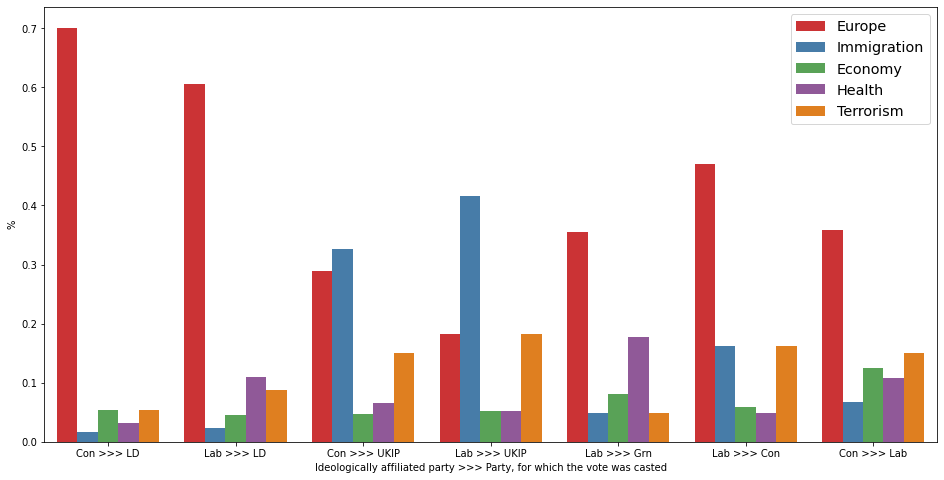

In [40]:
import seaborn as sns
colors = ["gold", "red", "royalblue", "faded green", "dusty purple"]
def SVbarplot(df, listOrder = None):
    fig, ax = plt.subplots()
    fig.set_size_inches(16,8)
    sns.barplot(x = 'PIDvsGEV', y='miiPercentage', data=df, hue='small_mii_cat', ax=ax,
                order=listOrder, palette = sns.color_palette("Set1", 5))
    ax.legend(fontsize = 'x-large')
    ax.set(xlabel='Ideologically affiliated party >>> Party, for which the vote was casted', ylabel='%')

SVbarplot(SV12groupby, listOrder = ['Con >>> LD', 'Lab >>> LD', 'Con >>> UKIP', 'Lab >>> UKIP',
                       'Lab >>> Grn', 'Lab >>> Con', 'Con >>> Lab'])
plt.savefig('sv2017.png', dpi=300, transparent=True, bbox_inches='tight', pad_inches=0.1);

#### 2015

In [41]:
signalVotingW04 = dataW04[['partyId', 'GEV','bestOnMII', 'small_mii_cat',
                           'PIdSuccess', 'GEVSuccess']]

signalVotingW04 = signalVotingW04[signalVotingW04['PIdSuccess'] > signalVotingW04['GEVSuccess']]
signalVotingW04 = create_PIDvsGEV(signalVotingW04)
len(signalVotingW04)

  0%|          | 0/1789 [00:00<?, ?it/s]

1789

In [42]:
print((signalVotingW04.PIDvsGEV.value_counts()/ len(signalVotingW04))[0:5])
largestCasesSV04 = list(signalVotingW04.PIDvsGEV.value_counts()[:5].index)
largestMMI04 = ['Health', 'Terrorism', 'Economy', 'Immigration', 'Inequality']

Conservative vs United Kingdom Independence Party (UKIP)    0.341532
Labour vs United Kingdom Independence Party (UKIP)          0.173281
Labour vs Green Party                                       0.114030
Labour vs Conservative                                      0.063723
Liberal Democrat vs Green Party                             0.040805
Name: PIDvsGEV, dtype: float64


In [43]:
SV04groupby = groupbySV_partyMII(signalVotingW04)
SV04groupby = create_PIDvsGEV(SV04groupby)
SV04groupby = SV04groupby[(SV04groupby['PIDvsGEV'].isin(largestCasesSV04)) & (SV04groupby['small_mii_cat'].isin(largestMMI04))]

SV04groupby = SV04groupby.replace(party_abbr)

SV04groupby = create_PIDvsGEV(SV04groupby, sep='>>>')

SV04groupby['small_mii_cat'] = SV04groupby['small_mii_cat'].astype('str')

  0%|          | 0/1452 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

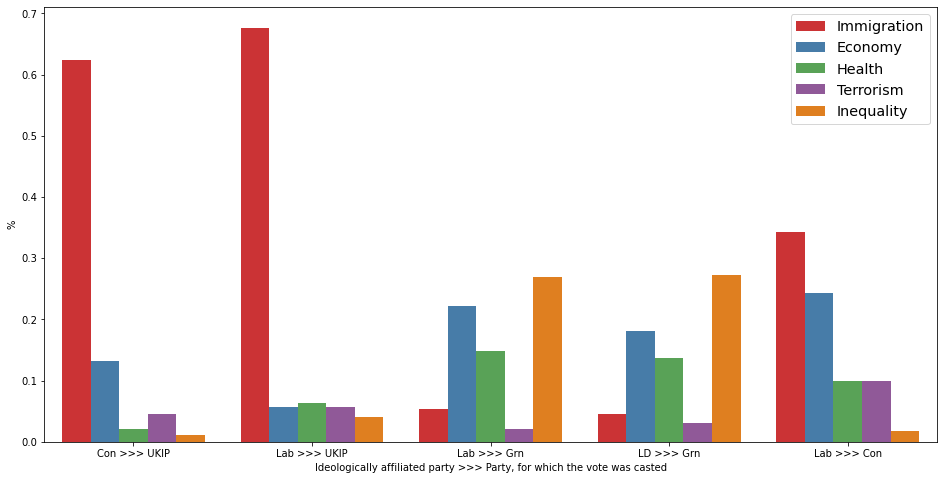

In [44]:
SVbarplot(SV04groupby, listOrder=['Con >>> UKIP','Lab >>> UKIP',
                                  'Lab >>> Grn', 'LD >>> Grn', 'Lab >>> Con'])
plt.savefig('sv2015.png', dpi=300, transparent=True, bbox_inches='tight', pad_inches=0.1);

### 7.3 Hypothesis 3, Economic voting

changeEconomy — Do you think that Economy is getting better, getting worse or staying about the same?

#### 2017

isPartyIdCon — is party, which is ideologically close to the voter, a Conservative party?

In [45]:
def create_isConservative(data):
    for row in tqdm(range(len(data))):
        if data.loc[row, "partyId"] == 'Conservative':
            data.loc[row, 'isPIdCon'] = 1
        else:
            data.loc[row, 'isPIdCon'] = 0
    return data

In [46]:
dataW12 = create_isConservative(dataW12)

  0%|          | 0/24828 [00:00<?, ?it/s]

In [47]:
economicVoting12 = dataW12[['partyId', 'GEV', 'DV_hasContradictions',
                            'PIdSuccess', 'GEVSuccess',
                            'PIdFailure', 'GEVFailure',
                            'changeEconomy', 'econPersonal', 'econGen', 'isPIdCon']]

In [48]:
logit2017EV = smf.logit(formula='DV_hasContradictions ~ C(isPIdCon)*changeEconomy', data = economicVoting12).fit()
print(logit2017EV.summary2())

Optimization terminated successfully.
         Current function value: 0.483181
         Iterations 7
                                 Results: Logit
Model:                  Logit                    Pseudo R-squared:     0.110     
Dependent Variable:     DV_hasContradictions     AIC:                  23439.3919
Date:                   2021-12-07 19:56         BIC:                  23471.7760
No. Observations:       24247                    Log-Likelihood:       -11716.   
Df Model:               3                        LL-Null:              -13156.   
Df Residuals:           24243                    LLR p-value:          0.0000    
Converged:              1.0000                   Scale:                1.0000    
No. Iterations:         7.0000                                                   
---------------------------------------------------------------------------------
                                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------

Looking at people who are satisfied with current economic development and voted against their preferences

In [49]:
evNotConPOS = economicVoting12[(economicVoting12['DV_hasContradictions'] == 1) & (economicVoting12['partyId'] != 'Conservative') & (economicVoting12['changeEconomy'] > 0)]
(evNotConPOS['GEV'].value_counts() / len(evNotConPOS)) * 100

Conservative                                77.989822
Labour                                       6.743003
I would/did not vote                         4.834606
Liberal Democrat                             4.325700
United Kingdom Independence Party (UKIP)     2.798982
Other                                        1.145038
Scottish National Party (SNP)                1.017812
Green Party                                  0.890585
Plaid Cymru                                  0.254453
Don't know                                   0.000000
Name: GEV, dtype: float64

In [50]:
evNotConOnly2 = economicVoting12[(economicVoting12['DV_hasContradictions'] == 1) & (economicVoting12['partyId'] != 'Conservative') & (economicVoting12['changeEconomy'] > 1)]
(evNotConOnly2['GEV'].value_counts() / len(evNotConOnly2)) * 100

Conservative                                91.176471
I would/did not vote                         5.882353
Labour                                       1.470588
United Kingdom Independence Party (UKIP)     1.470588
Liberal Democrat                             0.000000
Scottish National Party (SNP)                0.000000
Plaid Cymru                                  0.000000
Green Party                                  0.000000
Other                                        0.000000
Don't know                                   0.000000
Name: GEV, dtype: float64

#### 2015

In [51]:
dataW04 = create_isConservative(dataW04)

  0%|          | 0/23303 [00:00<?, ?it/s]

In [52]:
economicVoting04 = dataW04[['partyId', 'GEV', 'DV_hasContradictions',
                            'PIdSuccess', 'GEVSuccess', 'PIdFailure', 'GEVFailure',
                            'changeEconomy', 'econPersonal', 'econGen', 'isPIdCon',
                            'gender', 'country', 'age']]

In [53]:
logit2015EV = smf.logit(formula='DV_hasContradictions ~ C(isPIdCon)*changeEconomy', data = economicVoting04).fit()
print(logit2015EV.summary2())

Optimization terminated successfully.
         Current function value: 0.508698
         Iterations 6
                                 Results: Logit
Model:                   Logit                   Pseudo R-squared:    0.022      
Dependent Variable:      DV_hasContradictions    AIC:                 23271.7820 
Date:                    2021-12-07 19:56        BIC:                 23303.9316 
No. Observations:        22866                   Log-Likelihood:      -11632.    
Df Model:                3                       LL-Null:             -11895.    
Df Residuals:            22862                   LLR p-value:         8.3375e-114
Converged:               1.0000                  Scale:               1.0000     
No. Iterations:          6.0000                                                  
---------------------------------------------------------------------------------
                                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------

Looking at people who are satisfied with current economic development and voted against their preferences

In [54]:
evNotConPOS04 = economicVoting04[(economicVoting04['DV_hasContradictions'] == 1) & (economicVoting04['partyId'] != 'Conservative') & (economicVoting04['changeEconomy'] > 0)]
(evNotConPOS04['GEV'].value_counts() / len(evNotConPOS04)) * 100

Conservative                                40.331492
United Kingdom Independence Party (UKIP)    16.969219
Labour                                      12.549329
Green Party                                  8.681926
Liberal Democrat                             7.576953
I would/did not vote                         5.998421
Scottish National Party (SNP)                5.682715
Plaid Cymru                                  1.104972
Other                                        0.947119
British National Party (BNP)                 0.157853
Don't know                                   0.000000
Name: GEV, dtype: float64

In [55]:
evNotConOnlyTwo04 = economicVoting04[(economicVoting04['DV_hasContradictions'] == 1) & (economicVoting04['partyId'] != 'Conservative') & (economicVoting04['changeEconomy'] > 1)]
(evNotConOnlyTwo04['GEV'].value_counts() / len(evNotConOnlyTwo04)) * 100

Conservative                                75.728155
United Kingdom Independence Party (UKIP)     8.737864
I would/did not vote                         4.854369
Labour                                       4.854369
Liberal Democrat                             2.912621
Scottish National Party (SNP)                1.941748
Plaid Cymru                                  0.970874
Green Party                                  0.000000
British National Party (BNP)                 0.000000
Other                                        0.000000
Don't know                                   0.000000
Name: GEV, dtype: float64

### 7.4 Logistic regression model for hypotheses 1 and 3

#### This combination of two assumptions into one is made for the sake of additional explanation

In [56]:
logit2017H_1_3 = smf.logit(formula='DV_hasContradictions ~ PIdSuccess * GEVSuccess + PIdFailure + GEVFailure + C(isPIdCon)*changeEconomy + gender + country + age', data = dataW12).fit()
print(logit2017H_1_3.summary2())

Optimization terminated successfully.
         Current function value: 0.288827
         Iterations 8
                                 Results: Logit
Model:                  Logit                    Pseudo R-squared:     0.436     
Dependent Variable:     DV_hasContradictions     AIC:                  12695.4261
Date:                   2021-12-07 19:56         BIC:                  12791.3767
No. Observations:       21936                    Log-Likelihood:       -6335.7   
Df Model:               11                       LL-Null:              -11227.   
Df Residuals:           21924                    LLR p-value:          0.0000    
Converged:              1.0000                   Scale:                1.0000    
No. Iterations:         8.0000                                                   
---------------------------------------------------------------------------------
                                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------

#### Moving to predictions

In [57]:
dataW12_4predict = dataW12[['DV_hasContradictions', 'PIdSuccess', 'GEVSuccess',
                            'PIdFailure', 'GEVFailure',
                            'isPIdCon', 'changeEconomy', 'gender', 'country', 'age']]
dataW12_4predict = dataW12_4predict.dropna()
predictedProb = logit2017H_1_3.predict(dataW12_4predict)

In [58]:
from sklearn.metrics import precision_recall_curve
def Find_Optimal_Cutoff(target, predicted):
    precisions, recalls, thresholds = precision_recall_curve(target, predicted)
#     optimalIndex = np.argmax(2 * (precisions * recalls) / (precisions + recalls)) #f1-score
    optimalIndex = np.argmin(np.abs(precisions - recalls))
    return thresholds[optimalIndex]

In order to calculate optimal threshold I use precision-recall curve

In [59]:
optimal_threshold = Find_Optimal_Cutoff(dataW12_4predict['DV_hasContradictions'], predictedProb)
print('Optimal threshold is', round(optimal_threshold, 3))

Optimal threshold is 0.341


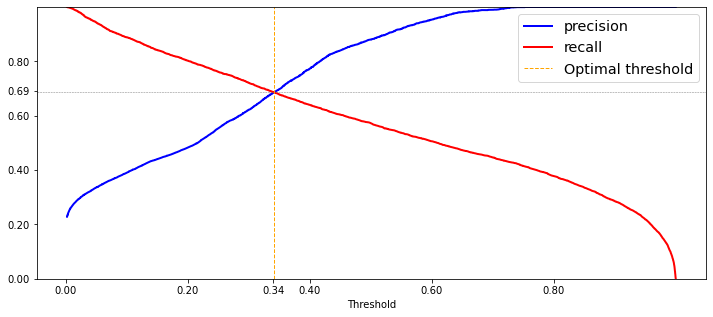

In [60]:
def plot_prec_recall_vs_tresh(y_true, y_predProb):
    precisions, recalls, thresholds = precision_recall_curve(y_true, y_predProb)
    
    OT_ind = np.argmin(np.abs(precisions - recalls))
    optimal_threshold = thresholds[OT_ind]
    precOT = precisions[OT_ind]
#     recOT = recalls[OT_ind]
    
    plt.figure(figsize=(12,5))
    plt.plot(thresholds, precisions[:-1], 'b-', linewidth = 2, label='precision')
    plt.plot(thresholds, recalls[:-1], 'r-', linewidth = 2, label = 'recall')
    plt.axvline(x=optimal_threshold, label = 'Optimal threshold', color='orange', linewidth=1, linestyle='--')
    plt.axhline(y=precOT, color='grey', linewidth=0.5, linestyle='--')
    
    plt.xlabel('Threshold')
    plt.xticks(np.append(np.arange(0,1,0.2), round(optimal_threshold, 2)))
    plt.yticks(np.append(np.arange(0,1,0.2), round(precOT, 2)))
    
    plt.legend(loc='upper right', fontsize = 'x-large')
    plt.ylim([0,1])

plot_prec_recall_vs_tresh(dataW12_4predict['DV_hasContradictions'], predictedProb)

plt.savefig('sensRecall2017.png', dpi=300, transparent=True, bbox_inches='tight', pad_inches=0.1)
plt.show()

In [61]:
predictedBinary = (predictedProb > optimal_threshold) * 1

In [62]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
print(confusion_matrix(y_true=dataW12_4predict['DV_hasContradictions'], y_pred=predictedBinary))

print('Accuracy: ', accuracy_score(y_true=dataW12_4predict['DV_hasContradictions'], y_pred=predictedBinary))
print('Recall: ', recall_score(y_true=dataW12_4predict['DV_hasContradictions'], y_pred=predictedBinary))
print('Precision: ', precision_score(y_true=dataW12_4predict['DV_hasContradictions'], y_pred=predictedBinary))

[[15931  1434]
 [ 1435  3136]]
Accuracy:  0.8692104303428154
Recall:  0.6860643185298622
Precision:  0.6862144420131291


#### Accuracy metrics. Predictions. 2015

In [63]:
logit2015H_1_3 = smf.logit(formula='DV_hasContradictions ~ PIdSuccess * GEVSuccess + PIdFailure + GEVFailure + C(isPIdCon)*changeEconomy + gender + country + age', data = economicVoting04).fit()
print(logit2015H_1_3.summary2())

Optimization terminated successfully.
         Current function value: 0.368830
         Iterations 7
                                 Results: Logit
Model:                  Logit                    Pseudo R-squared:     0.254     
Dependent Variable:     DV_hasContradictions     AIC:                  13313.6765
Date:                   2021-12-07 19:56         BIC:                  13407.2647
No. Observations:       18016                    Log-Likelihood:       -6644.8   
Df Model:               11                       LL-Null:              -8907.2   
Df Residuals:           18004                    LLR p-value:          0.0000    
Converged:              1.0000                   Scale:                1.0000    
No. Iterations:         7.0000                                                   
---------------------------------------------------------------------------------
                                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------

In [64]:
dataW04_4predict = dataW04[['DV_hasContradictions', 'PIdSuccess', 'GEVSuccess',
                            'PIdFailure', 'GEVFailure',
                            'isPIdCon', 'changeEconomy',
                            'gender', 'country', 'age']]
dataW04_4predict = dataW04_4predict.dropna()
predicted2015Prob = logit2015H_1_3.predict(dataW04_4predict)

In [65]:
optimal_threshold2015 = Find_Optimal_Cutoff(dataW04_4predict['DV_hasContradictions'], predicted2015Prob)
print('Optimal threshold is', round(optimal_threshold2015, 3))

Optimal threshold is 0.327


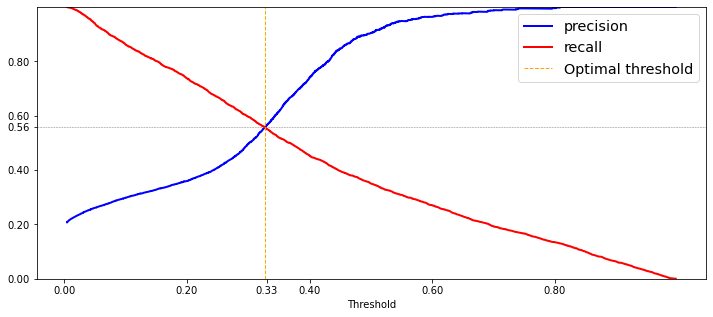

In [66]:
plot_prec_recall_vs_tresh(dataW04_4predict['DV_hasContradictions'], predicted2015Prob)

plt.savefig('sensRecall2015.png', dpi=300, transparent=True, bbox_inches='tight', pad_inches=0.1)
plt.show()

In [67]:
predictedBinary2015 = (predicted2015Prob > optimal_threshold2015) * 1

In [68]:
print(confusion_matrix(y_true=dataW04_4predict['DV_hasContradictions'], y_pred=predictedBinary2015))

print('Accuracy: ', accuracy_score(y_true=dataW04_4predict['DV_hasContradictions'], y_pred=predictedBinary2015))
print('Recall: ', recall_score(y_true=dataW04_4predict['DV_hasContradictions'], y_pred=predictedBinary2015))
print('Precision: ', precision_score(y_true=dataW04_4predict['DV_hasContradictions'], y_pred=predictedBinary2015))

[[12931  1559]
 [ 1560  1966]]
Accuracy:  0.8268761101243339
Recall:  0.5575723199092456
Precision:  0.5577304964539007


### 7.5 Hypothesis 4, Hierarchy of beliefs

In [69]:
selectedVar = ['partyId', 'GEV', 'mii', 'bestOnMII', 'mii_cat', 'small_mii_cat',
               'handleMIICon', 'handleMIILab', 'handleMIILD', 'handleMIIUKIP', 'handleMIIGrn',
               'DV_hasContradictions']
MIIdataW12 = dataW12[selectedVar]
MIIdataW04 = dataW04[selectedVar] 

In [70]:
party_abbr_handle = {"Conservative" : "Con", "Labour": "Lab", "Liberal Democrat": "LD",
                     "Green Party": "Grn", "United Kingdom Independence Party (UKIP)": "UKIP"}

def makeHandleVars(data, labelBar=''):
    for row in tqdm(range(len(data)), desc = labelBar):
        try:
            if data.loc[row, "partyId"] in party_abbr_handle:
                data.loc[row, "PIdHandleMII"] = data.loc[row,"handleMII" + party_abbr_handle[data.loc[row, "partyId"]]]

            if data.loc[row, "GEV"] in party_abbr_handle:
                data.loc[row, "GEVHandleMII"] = data.loc[row,"handleMII" + party_abbr_handle[data.loc[row, "GEV"]]]
        except BaseException as error:
            print(error)
            print(" ", row)
    return data

In [71]:
MIIdataW12 = makeHandleVars(MIIdataW12, labelBar='2017')
MIIdataW04 = makeHandleVars(MIIdataW04, labelBar='2015')

2017:   0%|          | 0/24828 [00:00<?, ?it/s]

2015:   0%|          | 0/23303 [00:00<?, ?it/s]

In [72]:
MIIdataW12 = MIIdataW12.dropna(subset=["PIdHandleMII", "GEVHandleMII"]).reset_index(drop = True)
MIIdataW04 = MIIdataW04.dropna(subset=["PIdHandleMII", "GEVHandleMII"]).reset_index(drop = True)

In [73]:
print(MIIdataW12['DV_hasContradictions'].value_counts())
print(MIIdataW04['DV_hasContradictions'].value_counts())

0    3824
1     993
Name: DV_hasContradictions, dtype: int64
0    3604
1     823
Name: DV_hasContradictions, dtype: int64


In [74]:
MIIdataW12['partyId'] = MIIdataW12['partyId'].astype('str')

miiLogitW12 = smf.logit(formula='DV_hasContradictions~PIdHandleMII+GEVHandleMII', data=MIIdataW12).fit()
print(miiLogitW12.summary2())

Optimization terminated successfully.
         Current function value: 0.444537
         Iterations 6
                            Results: Logit
Model:              Logit                Pseudo R-squared: 0.126      
Dependent Variable: DV_hasContradictions AIC:              4288.6701  
Date:               2021-12-07 19:56     BIC:              4308.1098  
No. Observations:   4817                 Log-Likelihood:   -2141.3    
Df Model:           2                    LL-Null:          -2450.9    
Df Residuals:       4814                 LLR p-value:      3.5800e-135
Converged:          1.0000               Scale:            1.0000     
No. Iterations:     6.0000                                            
-----------------------------------------------------------------------
                   Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-----------------------------------------------------------------------
Intercept          0.3479    0.1182    2.9426  0.0033   0.1162   0.5797

In [75]:
MIIdataW04['partyId'] = MIIdataW04['partyId'].astype('str')

miiLogitW04 = smf.logit(formula='DV_hasContradictions~PIdHandleMII+GEVHandleMII', data=MIIdataW04).fit()
print(miiLogitW04.summary2())

Optimization terminated successfully.
         Current function value: 0.385894
         Iterations 7
                            Results: Logit
Model:              Logit                Pseudo R-squared: 0.196      
Dependent Variable: DV_hasContradictions AIC:              3422.7042  
Date:               2021-12-07 19:56     BIC:              3441.8906  
No. Observations:   4427                 Log-Likelihood:   -1708.4    
Df Model:           2                    LL-Null:          -2126.0    
Df Residuals:       4424                 LLR p-value:      4.2408e-182
Converged:          1.0000               Scale:            1.0000     
No. Iterations:     7.0000                                            
-----------------------------------------------------------------------
                   Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-----------------------------------------------------------------------
Intercept         -0.5718    0.1178   -4.8529  0.0000  -0.8027  -0.3409